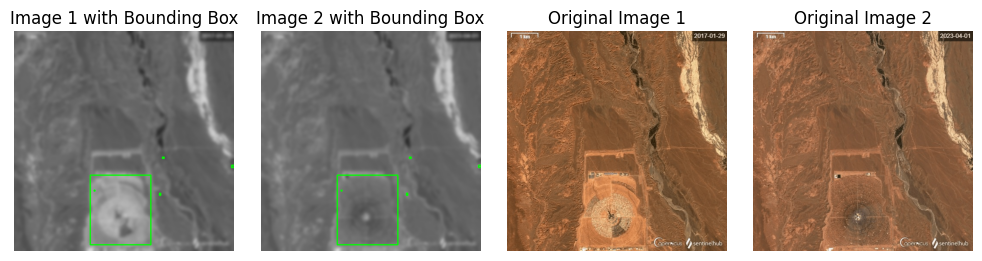

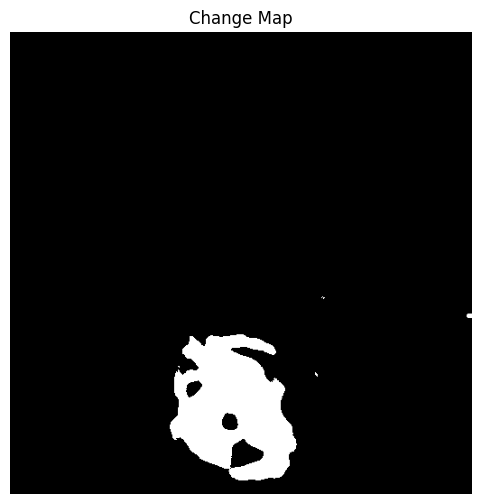

SSIM score: 0.9529525617397296


In [7]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (21,21 ), 0)
    return blurred

def perform_change_detection(image1_path, image2_path):
    image1 = preprocess_image(image1_path)
    image2 = preprocess_image(image2_path)

    # Structural similarity index (SSIM)
    ssim_score = ssim(image1, image2)

    # Absolute difference map
    diff_map = cv2.absdiff(image1, image2)

    # Threshold the difference map to highlight changes
    threshold = 35
    _, change_map = cv2.threshold(diff_map, threshold, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(change_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("No change detected")
        return

    image1_bbox = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)
    image2_bbox = cv2.cvtColor(image2, cv2.COLOR_GRAY2RGB)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Draw the bounding box on both images
        image1_bbox = cv2.rectangle(image1_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)
        image2_bbox = cv2.rectangle(image2_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)

        
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 4, 1)
    plt.title('Image 1 with Bounding Box')
    plt.imshow(image1_bbox)
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.title('Image 2 with Bounding Box')
    plt.imshow(image2_bbox)
    plt.axis('off')

    org_image1 = cv2.imread(image1_path)
    org_image2 = cv2.imread(image2_path)

    plt.subplot(2, 4, 3)
    plt.title('Original Image 1')
    plt.imshow(cv2.cvtColor(org_image1, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.title('Original Image 2')
    plt.imshow(cv2.cvtColor(org_image2, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Display the change map
    plt.figure(figsize=(6, 6))
    plt.title('Change Map')
    plt.imshow(change_map, cmap='gray')
    plt.axis('off')
    plt.show()

    print(f"SSIM score: {ssim_score}")

image1_path = "2017.jpg"
image2_path = "2023.jpg"
perform_change_detection(image1_path, image2_path)

